# Precision Plots

In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

target_folder = 'MMSR25-26-Group-E'
current_path = os.getcwd()

while os.path.basename(current_path) != target_folder:
    if os.path.basename(current_path) == 'RetrievalAlgorithm':
        if os.path.join(current_path) not in sys.path:
            sys.path.append(os.path.join(current_path))
    parent = os.path.dirname(current_path)
    os.chdir(parent)
    current_path = parent
print(current_path)

from RetrievalAlgorithm.src.utils.plotting import plot_metrics_at_k, plot_describe_heatmaps

D:\University\7th_Semester\MMSR25-26-Group-E


In [2]:
norm_names = ['max_abs', 'min_max', 'raw', 'standard', 'robust']

figs_dict = {}

## Unimodal

### Load Data

In [3]:
lyrics_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/unimodal/{norm_name}/unimodal_{norm_name}_lyrics_precision.parquet'
    )
    for norm_name in tqdm(norm_names, desc='Loading Unimodal Lyrics Precision')
}

audio_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/unimodal/{norm_name}/unimodal_{norm_name}_audio_precision.parquet'
    )
    for norm_name in tqdm(norm_names, desc='Loading Unimodal Audio Precision')
}

video_dfs =  {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/unimodal/{norm_name}/unimodal_{norm_name}_video_precision.parquet'
    )
    for norm_name in tqdm(norm_names, desc='Loading Unimodal Video Precision')
}

Loading Unimodal Video Precision: 100%|██████████| 5/5 [00:00<00:00, 196.92it/s]


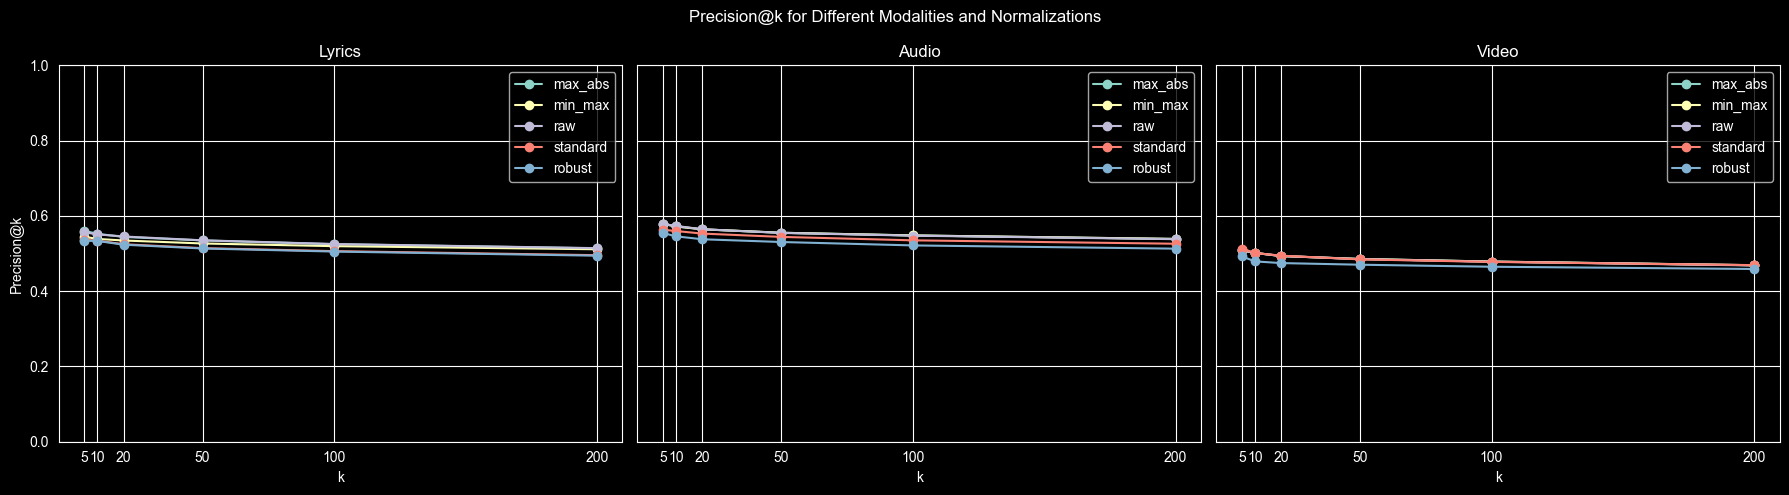

In [4]:
figs_dict['unimodal_precision_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[lyrics_dfs, audio_dfs, video_dfs],
    modality_names=['Lyrics', 'Audio', 'Video'],
)

### Lyrics (BERT)

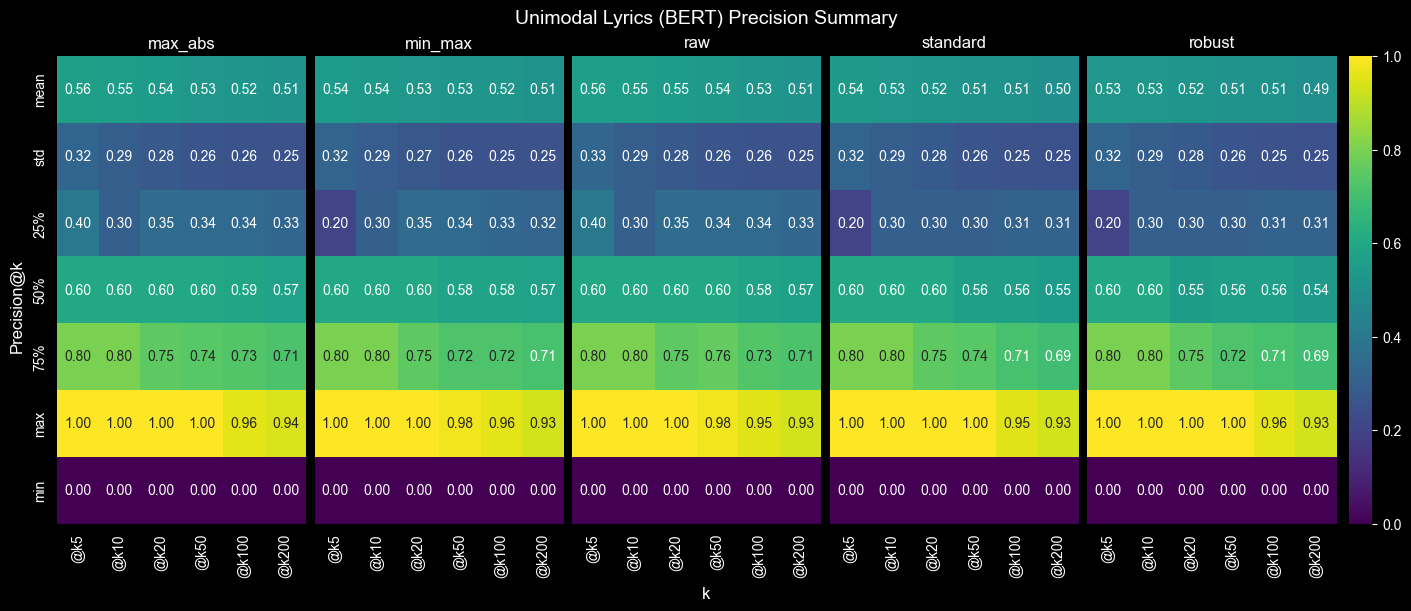

In [5]:
figs_dict['unimodal_lyrics_precision_summary'] = plot_describe_heatmaps(dfs=lyrics_dfs,
                       fig_title='Unimodal Lyrics (BERT) Precision Summary',
                       x_label='k',
                       y_label='Precision@k',)

### Audio (MFCC)

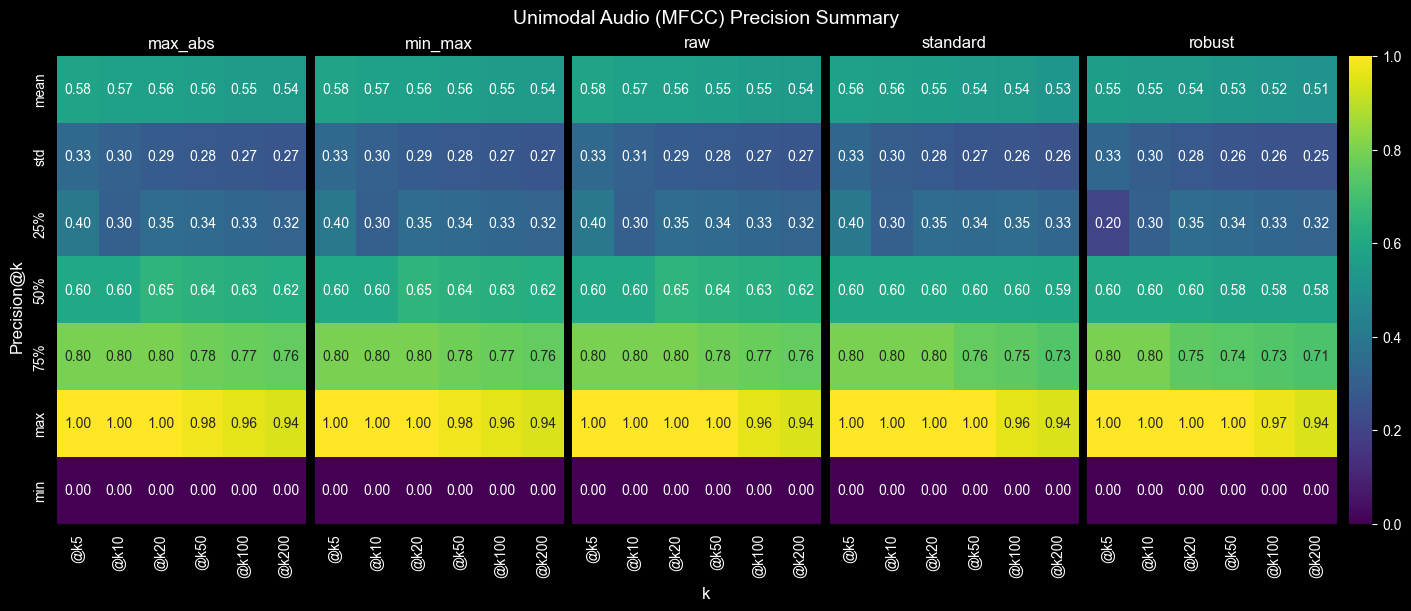

In [6]:
figs_dict['unimodal_audio_precision_summary'] = plot_describe_heatmaps(dfs=audio_dfs,
                       fig_title='Unimodal Audio (MFCC) Precision Summary',
                       x_label='k',
                       y_label='Precision@k',)

### Video (VGG19)

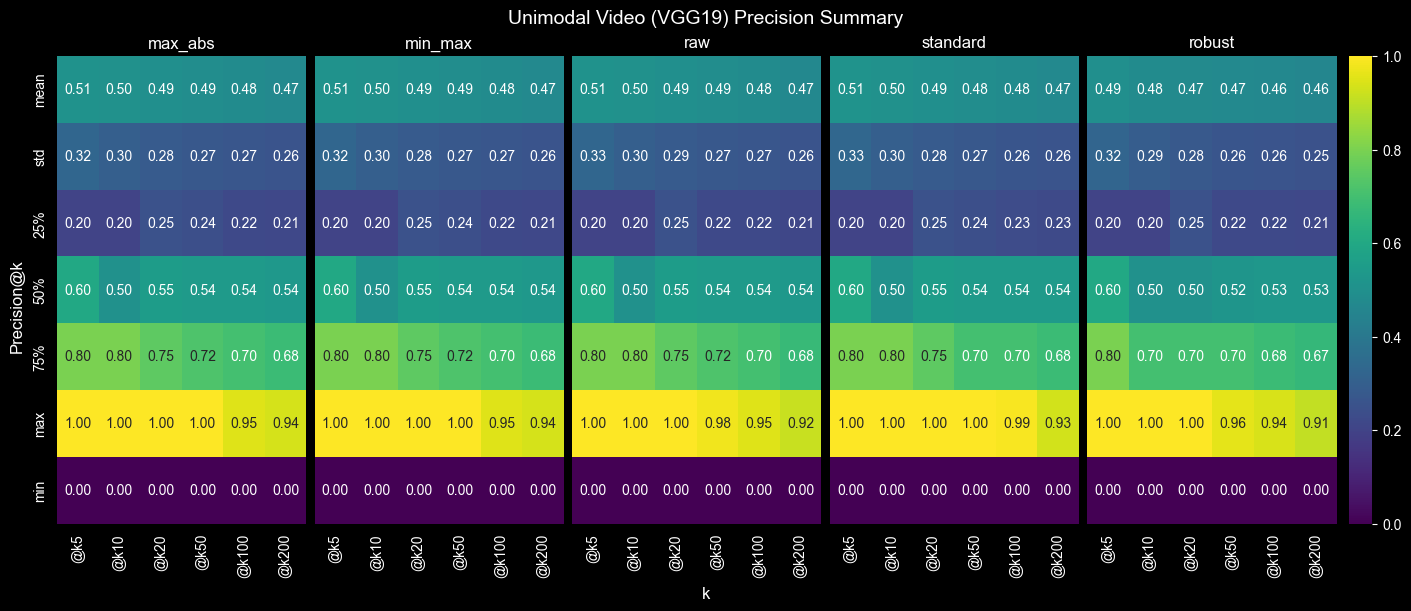

In [7]:
figs_dict['unimodal_video_precision_summary'] = plot_describe_heatmaps(dfs=video_dfs,
                       fig_title='Unimodal Video (VGG19) Precision Summary',
                       x_label='k',
                       y_label='Precision@k',)

In [8]:
del lyrics_dfs, audio_dfs, video_dfs

## Multimodal (Early Fusion)

In [9]:
audio_video_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/multimodal_{norm_name}_audio_videoclips_precision.parquet'
    )
    for norm_name in tqdm(norm_names, desc='Loading Multimodal Audio+Video Precision')
}

lyrics_audio_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/multimodal_{norm_name}_lyrics_audio_precision.parquet'
    )
    for norm_name in tqdm(norm_names, desc='Loading Multimodal Lyrics+Audio Precision')
}

lyrics_video_dfs =  {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/multimodal_{norm_name}_lyrics_videoclips_precision.parquet'
    )
    for norm_name in tqdm(norm_names, desc='Loading Multimodal Lyrics+Video Precision')
}

lyrics_audio_video_dfs =  {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/multimodal_{norm_name}_lyrics_audio_videoclips_precision.parquet'
    )
    for norm_name in tqdm(norm_names, desc='Loading Multimodal Lyrics+Audio+Video Precision')
}

Loading Multimodal Lyrics+Audio+Video Precision: 100%|██████████| 5/5 [00:00<00:00, 189.61it/s]


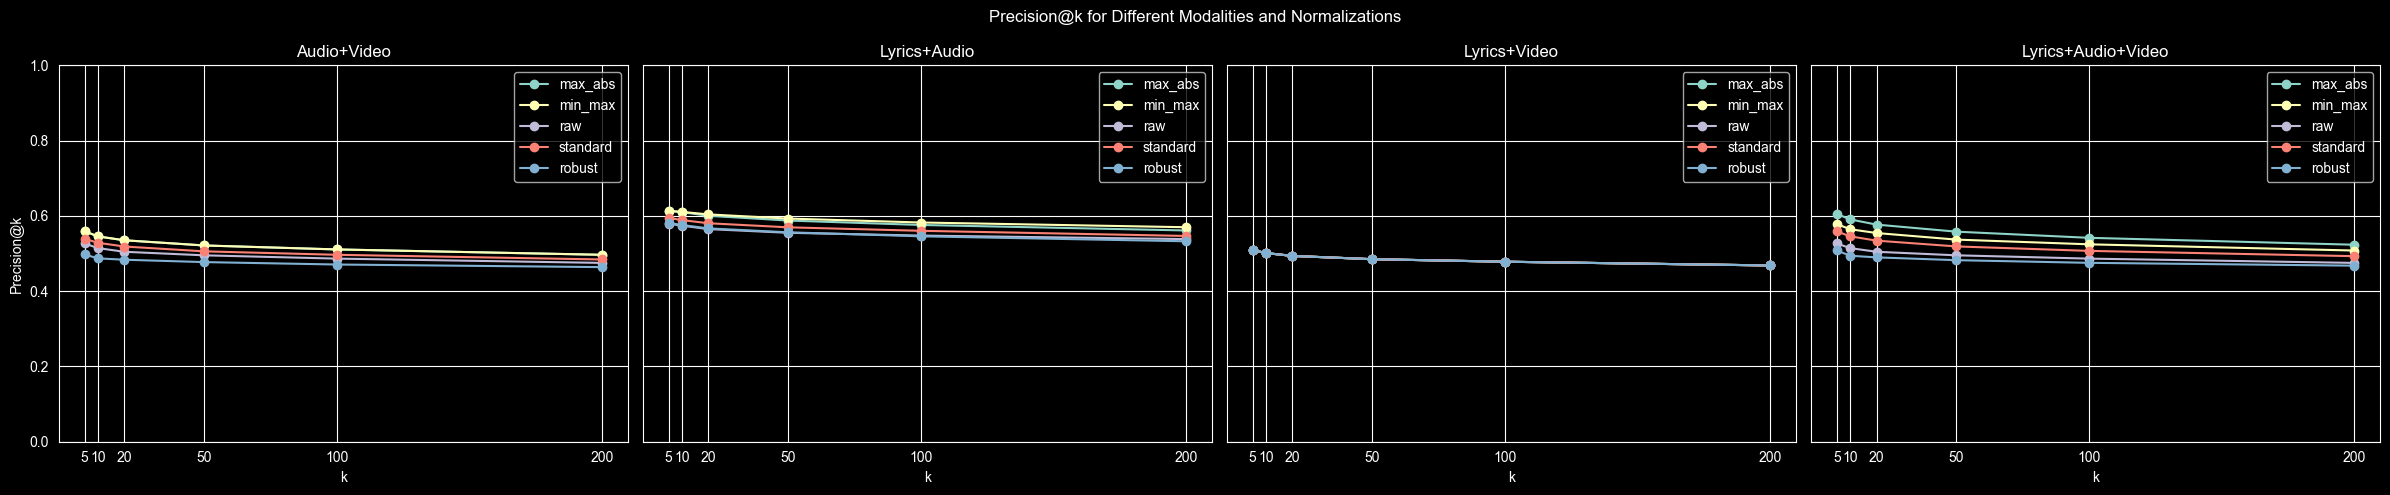

In [10]:
figs_dict['multimodal_early_fusion_precision_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[audio_video_dfs, lyrics_audio_dfs, lyrics_video_dfs, lyrics_audio_video_dfs],
    modality_names=['Audio+Video', 'Lyrics+Audio', 'Lyrics+Video', 'Lyrics+Audio+Video'],
)

### Audio + Video

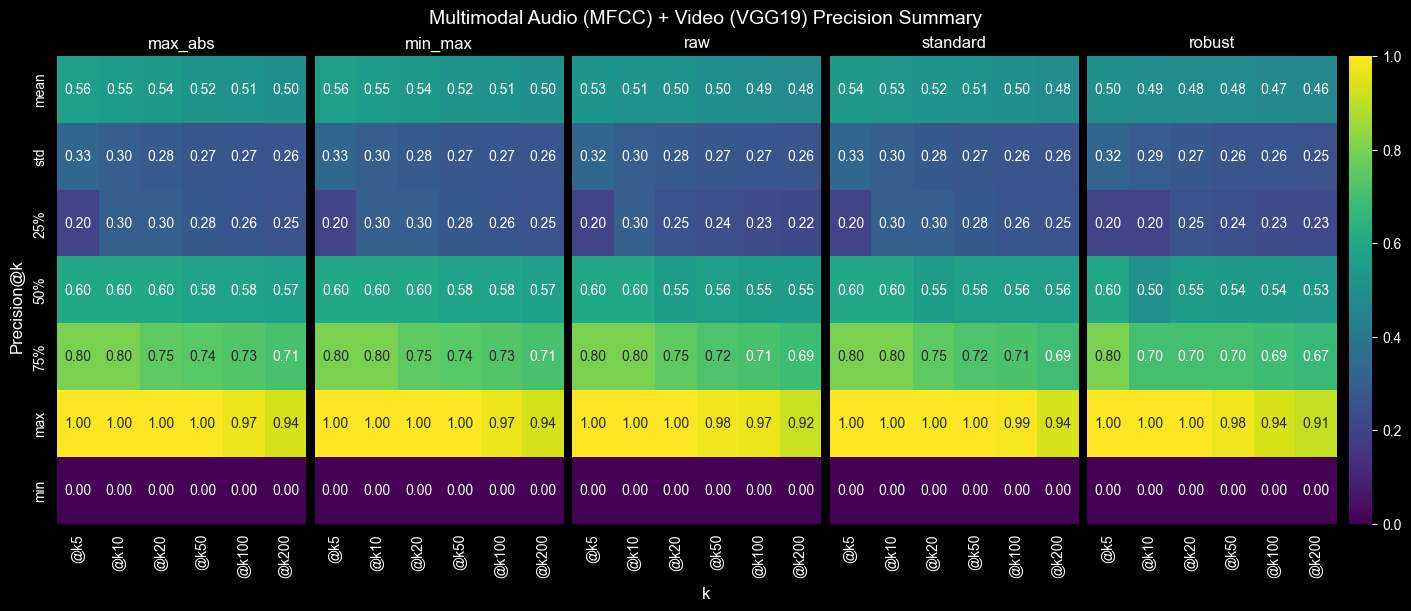

In [11]:
figs_dict['multimodal_audio_video_precision_summary'] = plot_describe_heatmaps(dfs=audio_video_dfs,
                       fig_title='Multimodal Audio (MFCC) + Video (VGG19) Precision Summary',
                       x_label='k',
                       y_label='Precision@k',)

### Lyrics + Audio

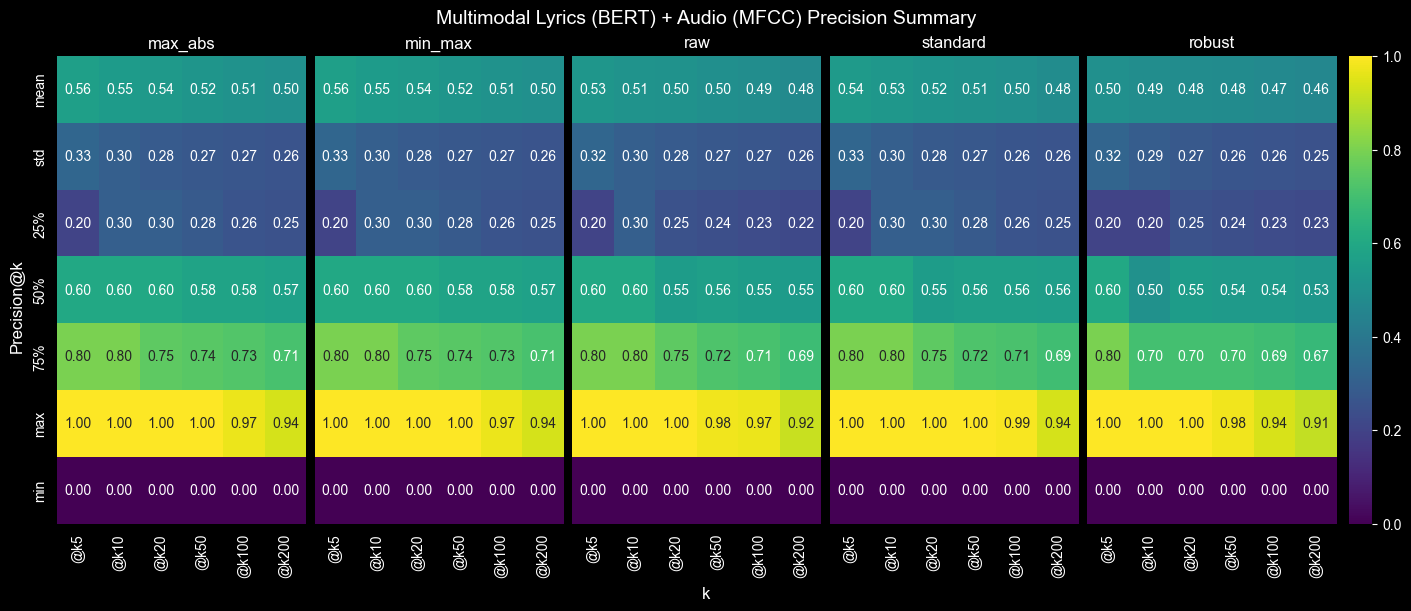

In [12]:
figs_dict['multimodal_lyrics_audio_precision_summary'] = plot_describe_heatmaps(dfs=audio_video_dfs,
                       fig_title='Multimodal Lyrics (BERT) + Audio (MFCC) Precision Summary',
                       x_label='k',
                       y_label='Precision@k',)

### Lyrics + Video

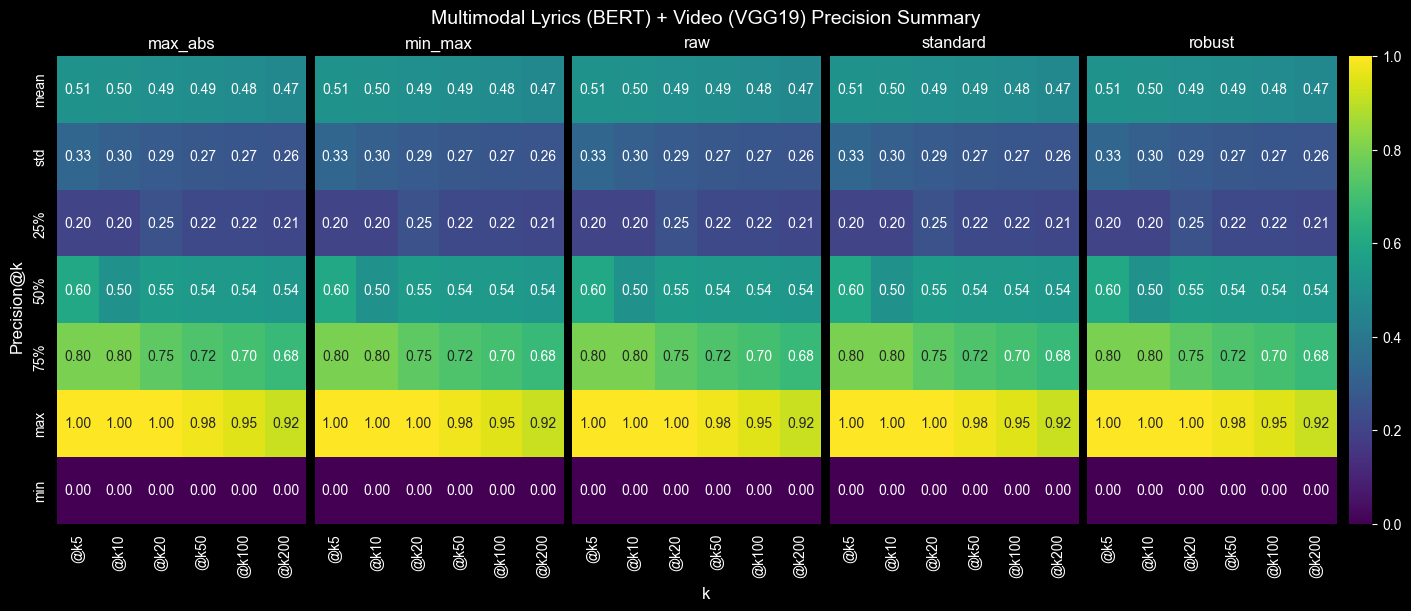

In [13]:
figs_dict['multimodal_lyrics_video_precision_summary'] = plot_describe_heatmaps(dfs=lyrics_video_dfs,
                       fig_title='Multimodal Lyrics (BERT) + Video (VGG19) Precision Summary',
                       x_label='k',
                       y_label='Precision@k',)

### Lyrics + Audio + Video

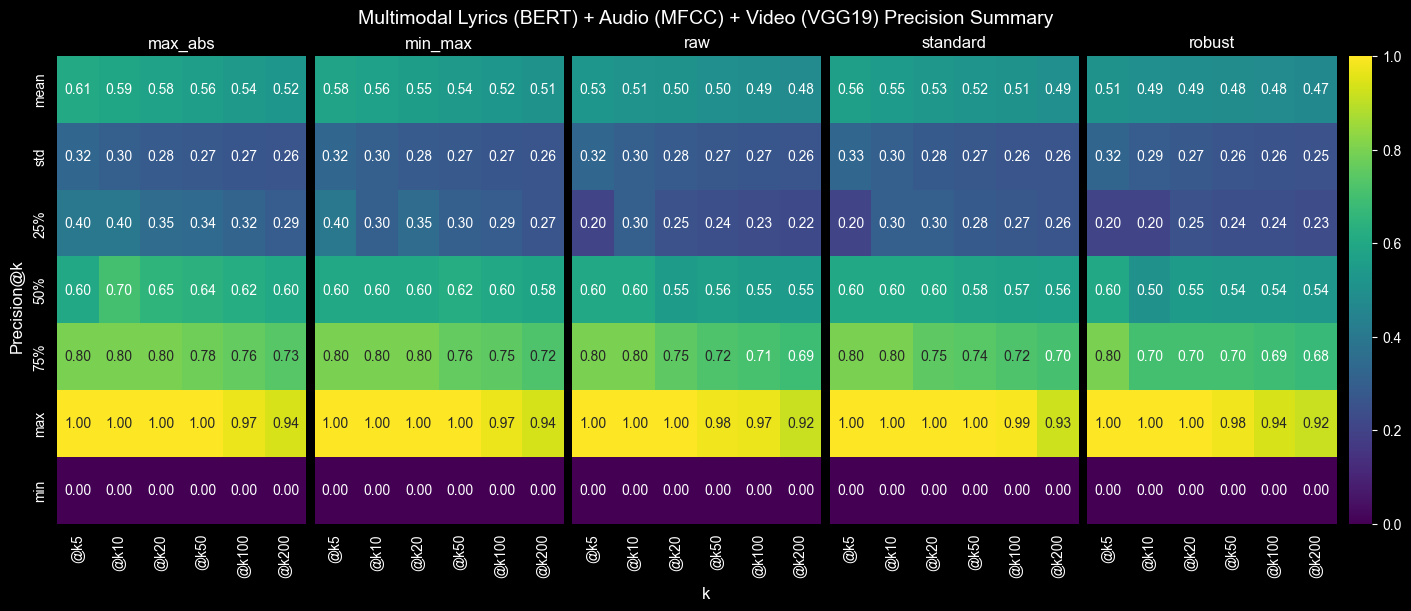

In [14]:
figs_dict['multimodal_lyrics_audio_video_precision_summary'] = plot_describe_heatmaps(dfs=lyrics_audio_video_dfs,
                       fig_title='Multimodal Lyrics (BERT) + Audio (MFCC) + Video (VGG19) Precision Summary',
                       x_label='k',
                       y_label='Precision@k',)

In [15]:
del audio_video_dfs, lyrics_audio_dfs, lyrics_video_dfs, lyrics_audio_video_dfs

## Multimodal (Late Fusion - Max Score)

In [16]:
max_scores_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/late_fusion/max_score/multimodal_{norm_name}_max_precision.parquet'
    )
    for norm_name in tqdm(norm_names, desc='Loading Multimodal Max Score Precision')
}

Loading Multimodal Max Score Precision: 100%|██████████| 5/5 [00:00<00:00, 230.26it/s]


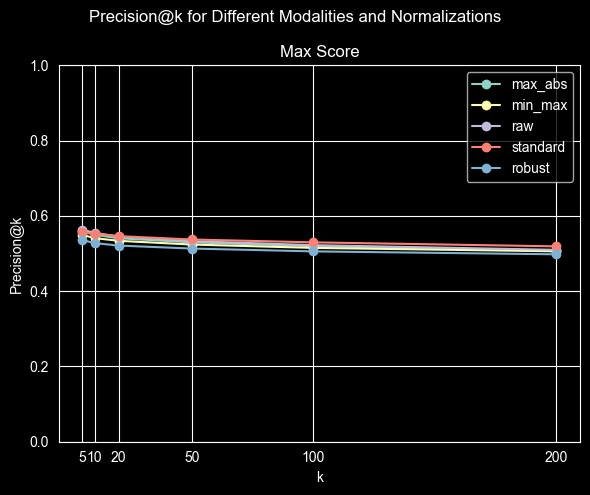

In [17]:
figs_dict['multimodal_late_fusion_precision_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[max_scores_dfs],
    modality_names=['Max Score'],
)

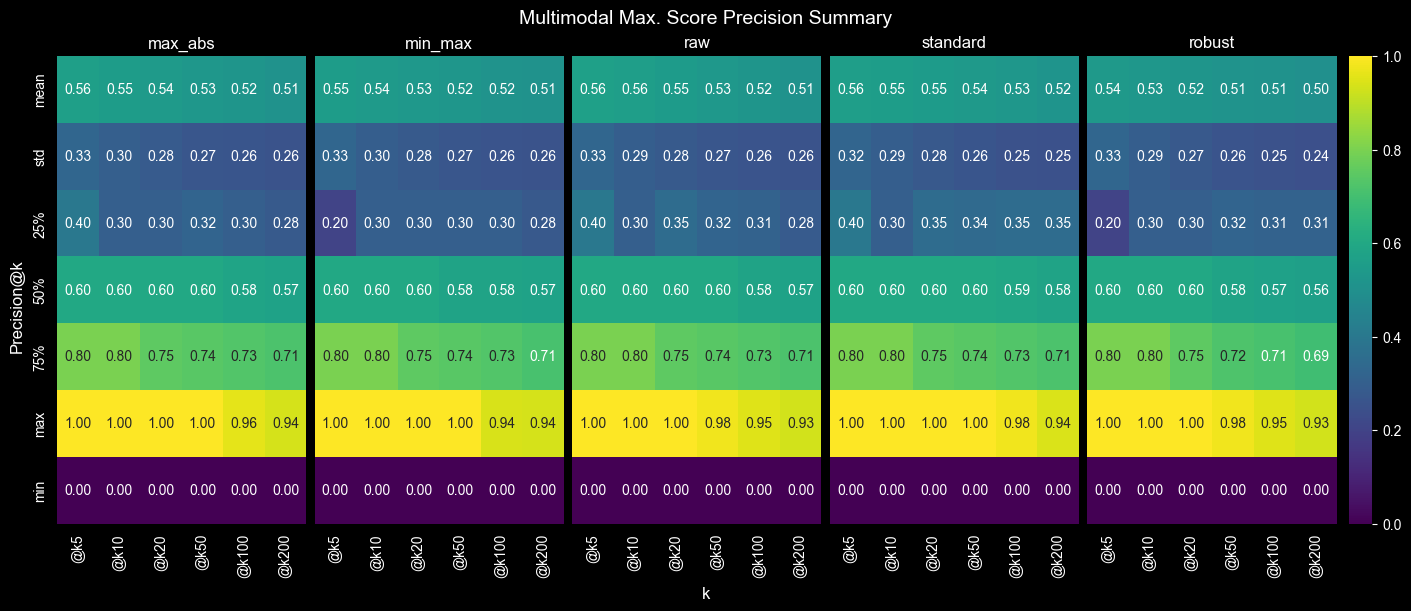

In [18]:
figs_dict['multimodal_max_score_precision_summary'] = plot_describe_heatmaps(dfs=max_scores_dfs,
                       fig_title='Multimodal Max. Score Precision Summary',
                       x_label='k',
                       y_label='Precision@k',)

## Save Plots as Files

In [19]:
folder_path = "RetrievalAlgorithm/plots/precision"
os.makedirs(folder_path, exist_ok=True)

for name, fig in figs_dict.items():
    file_path = os.path.join(folder_path, f'{name}.png')
    fig.savefig(file_path)
    plt.close(fig)

print(f'Saved {len(figs_dict)} figures to {folder_path}')

Saved 11 figures to RetrievalAlgorithm/plots/precision
